In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


# Challenge: Credit Card Fraud
## Thinkful Unit 3, Lesson 6
Using this credit card fraud dataset develop an algorithm to predict fraud. Prioritize correctly finding fraud rather than correctly labeling non-fraudulent transactions.

https://www.kaggle.com/mlg-ulb/creditcardfraud

In [4]:
df = pd.read_csv('datasets/creditcard.csv')

In [5]:
# Instantiate Model

# consider trying out only the first few variables. PCA lists them in order of importance.
# consider testing with another dataset for overfitting. 

X = df.drop(['Class'], axis=1)
Y = df['Class']


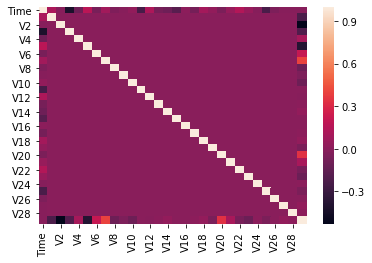

In [6]:
X_corr = X.corr()
sns.heatmap(X_corr)

In [7]:
# Holdout Groups

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

In [8]:
lr = LogisticRegression(C=.9)
fit = lr.fit(X_train, Y_train)
print(lr.score(X_test, Y_test))

print('vanilla cv score:\n', cross_val_score(lr, X_test, Y_test, cv=10))

c:\users\mango\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9988237772550121


c:\users\mango\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\mango\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\mango\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\mango\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\mango\appdata\local\programs\python\python37\lib\si

vanilla cv score:
 [0.99982447 0.99929788 0.99894681 0.99894681 0.99929775 0.99912219
 0.99841994 0.99859551 0.99841967 0.99912204]


In [9]:

predict_train = lr.predict(X_train)
predict_test = lr.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(Y_train, predict_train, margins=True)
table_test = pd.crosstab(Y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.0003906164278347122
Percent Type II errors: 0.0007241765235137923

Test set accuracy:
Percent Type I errors: 0.0004915557740247885
Percent Type II errors: 0.0006846669709630982


Are these results too good....?